In [1]:
# 모듈 및 데이터 로드 
from sklearn.datasets import load_breast_cancer 
from sklearn.linear_model import LogisticRegression 

data = load_breast_cancer() 

# x, y 데이터 생성 
X = data.data 

# 악성을 1, 양성을 0으로 
y = 1 - data.target 

# 특징으로 사용할 데이터를 평균으로 구분하는 10개 열로 축소
X = X[:, :10] 

# 로지스틱 회귀 모델 생성 
model_lor = LogisticRegression(solver = 'lbfgs') 
model_lor.fit(X,y) 
y_pred = model_lor.predict(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* 오차 행렬(혼동 행렬) 생성

In [2]:
# 종속 변수와 예측 결과로 혼동 행렬 생성
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y, y_pred)
print(cm)

[[337  20]
 [ 30 182]]


* 정확도

In [3]:
from sklearn.metrics import accuracy_score 
print(accuracy_score(y, y_pred))

0.9121265377855887


* 정밀도

In [4]:
from sklearn.metrics import precision_score 
print(precision_score(y,y_pred))

0.900990099009901


* 재현율

In [5]:
from sklearn.metrics import recall_score 
print(recall_score(y,y_pred))

0.8584905660377359


* F1 score

In [6]:
from sklearn.metrics import f1_score 
print(f1_score(y, y_pred))

0.8792270531400966


* 예측 확률(pred_proba) : 0으로 예측할 확률이 0.1보다 크면 y_pred2 에 넣는다 가정.

In [7]:
from sklearn.preprocessing import Binarizer
model_lor.predict_proba(X)

array([[7.69543428e-03, 9.92304566e-01],
       [2.03561990e-02, 9.79643801e-01],
       [2.34733703e-03, 9.97652663e-01],
       ...,
       [2.34686021e-02, 9.76531398e-01],
       [8.11350734e-06, 9.99991886e-01],
       [9.99573328e-01, 4.26671727e-04]])

In [8]:
# y과 y_pred2의 혼동행렬, 정확도, 정밀도, 재현율, f1 score 구하기
import numpy as np
y_pred2 = (model_lor.predict_proba(X)[:,1]>0.1).astype(np.int) 

# 혼동행렬 
print(confusion_matrix(y,y_pred2)) 

# 정확도 
print(accuracy_score(y, y_pred2)) 

# 정밀도 
print(precision_score(y,y_pred2)) 

# 재현율 
print(recall_score(y,y_pred2)) 

# f1 score 
print(f1_score(y, y_pred2))

[[267  90]
 [  6 206]]
0.8312829525483304
0.6959459459459459
0.9716981132075472
0.8110236220472441


<ipython-input-8-9ed1469c9fb8>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_pred2 = (model_lor.predict_proba(X)[:,1]>0.1).astype(np.int)


* ROC 곡선 시각화

In [9]:
from sklearn.metrics import roc_curve 
probas = model_lor.predict_proba(X) 
fpr, tpr, thresholds = roc_curve(y, probas[:,1])

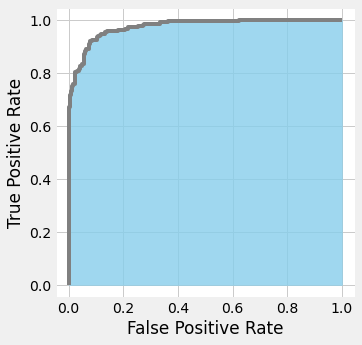

In [10]:
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight') 
fig, ax = plt.subplots()
fig.set_size_inches(4.8, 5) 
ax.step(fpr, tpr, 'gray') 
ax.fill_between(fpr, tpr, 0, color='skyblue', alpha=0.8)
ax.set_xlabel('False Positive Rate') 
ax.set_ylabel('True Positive Rate') 
ax.set_facecolor('xkcd:white') 
plt.show()

* ROC AUC 값

In [12]:
from sklearn.metrics import roc_auc_score 
roc_auc_score(y, probas[:,1])

0.9741557000158554